In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
car_df = pd.read_csv('/Users/swarnim/Desktop/car data.csv')

In [3]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [6]:
year_counts = car_df['Year'].value_counts()

In [7]:
year_counts

Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64

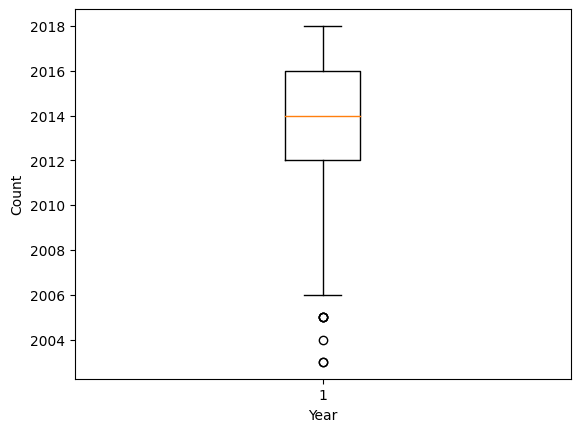

In [8]:
plt.boxplot(car_df['Year'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [14]:
validyr = year_counts[year_counts >= 4].index

In [15]:
car_dfclean = car_df[car_df['Year'].isin(validyr)]

In [16]:
car_dfclean.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [18]:
year_counts = car_dfclean['Year'].value_counts()
year_counts

Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
Name: count, dtype: int64

In [19]:
whosell = car_dfclean['Selling_type'].value_counts()
whosell

Selling_type
Dealer        192
Individual    103
Name: count, dtype: int64

In [20]:
avg_kms = car_dfclean['Driven_kms'].mean()
avg_kms

36247.06440677966

In [21]:
car_dfclean['Above avg km'] = car_dfclean['Driven_kms'] > avg_kms

/var/folders/n4/p_fj_ynn6h10bx3rj6h9b57r0000gn/T/ipykernel_4072/1802593293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_dfclean['Above avg km'] = car_dfclean['Driven_kms'] > avg_kms


In [22]:
no_aboveavg = car_dfclean['Above avg km'].sum()

In [23]:
no_aboveavg

120

In [24]:
no_belowavg = len(car_dfclean) - no_aboveavg
no_belowavg

175

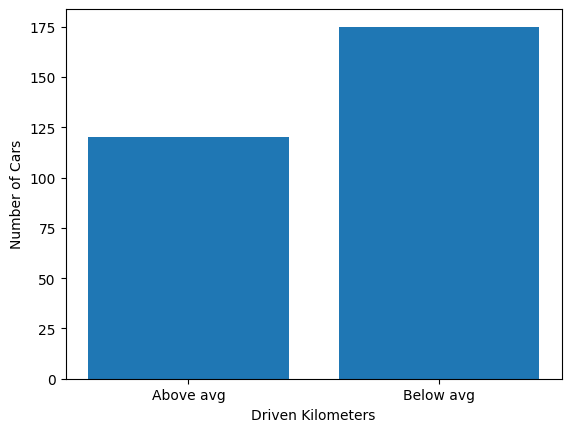

In [26]:
plt.bar(['Above avg', 'Below avg'], [no_aboveavg, no_belowavg])
plt.xlabel('Driven Kilometers')
plt.ylabel('Number of Cars')
plt.show()

In [36]:
avg_price_above_avg = car_dfclean[car_dfclean['Above avg km']]['Present_Price'].mean()
avg_price_below_avg = car_dfclean[~car_dfclean['Above avg km']]['Present_Price'].mean()
avg_price_above_avg, avg_price_below_avg

(11.058366666666668, 5.34512)

In [37]:
avg_price_above_avg = car_dfclean[car_dfclean['Above avg km']]['Selling_Price'].mean()
avg_price_below_avg = car_dfclean[~car_dfclean['Above avg km']]['Selling_Price'].mean()
avg_price_above_avg, avg_price_below_avg

(5.634333333333332, 4.075771428571429)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [39]:
features = car_dfclean[['Driven_kms', 'Year', 'Present_Price', 'Owner', 'Selling_type', 'Fuel_Type']]
target = car_dfclean['Selling_Price']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [42]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['Selling_type', 'Fuel_Type'])
    ],
    remainder='passthrough'
)

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [43]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Selling_type',
                                                   'Fuel_Type'])])),
                ('regressor', LinearRegression())])

In [44]:
predictions = model.predict(X_test)

In [45]:
mse = mean_squared_error(y_test, predictions)

In [46]:
mse

6.240205991754942

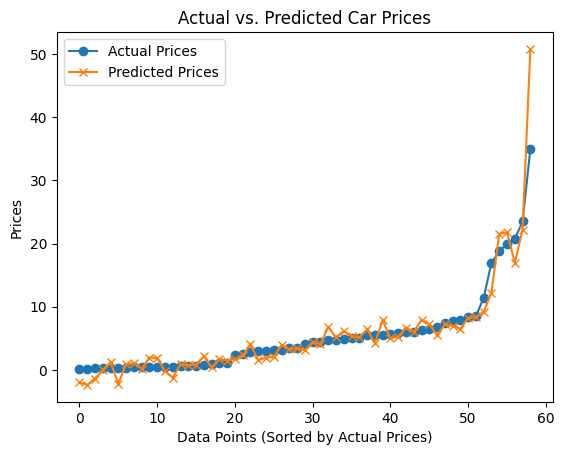

In [48]:
index = np.arange(len(y_test))

sorted_indices = np.argsort(y_test)

plt.plot(index, np.array(y_test)[sorted_indices], label='Actual Prices', marker='o')
plt.plot(index, np.array(predictions)[sorted_indices], label='Predicted Prices', marker='x')

plt.xlabel('Data Points (Sorted by Actual Prices)')
plt.ylabel('Prices')
plt.title('Actual vs. Predicted Car Prices')
plt.legend()

plt.show()